# Ce notebook a pour objectif d'analyser les résultats des métriques ragas et préparer les visualisations

## Analyse de la première évaluation ragas

### Librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Chargement du dataframe des résultats

In [2]:
df = pd.read_csv('../data/processed/results_first_ragas.csv')

### On vérifie qu'on a bien toutes les colonnes

In [3]:
df.columns

Index(['type des questions', 'id', 'question', 'ground_truths', 'answer',
       'contexts', 'source_scores', 'faithfulness', 'answer_relevancy',
       'context_precision', 'context_recall'],
      dtype='object')

In [4]:
type(df)

pandas.core.frame.DataFrame

### Regardons par type de questions les résultats obtenus

In [5]:
df[['type des questions','faithfulness','answer_relevancy','context_precision','context_recall']]

,type des questions,faithfulness,answer_relevancy,context_precision,context_recall
0,Question simple,NaN,0.907825,1.000000,1.0
1,Question simple,0.0,0.944392,0.000000,0.0
2,Question simple,0.0,NaN,0.333333,0.0
3,Question simple,NaN,0.939146,NaN,0.0
4,Question simple,1.0,NaN,0.333333,1.0
5,Question intermédiaire,0.0,0.963802,0.500000,1.0
6,Question intermédiaire,0.0,NaN,0.000000,0.0
7,Question intermédiaire,0.0,0.886742,0.000000,0.0
8,Question intermédiaire,0.5,NaN,0.000000,0.0
9,Question intermédiaire,0.0,0.903687,0.000000,0.0


### Préparation pour visualisation par type de question

In [7]:
df_groupby = df.groupby('type des questions')[['faithfulness','answer_relevancy','context_precision','context_recall']].mean()

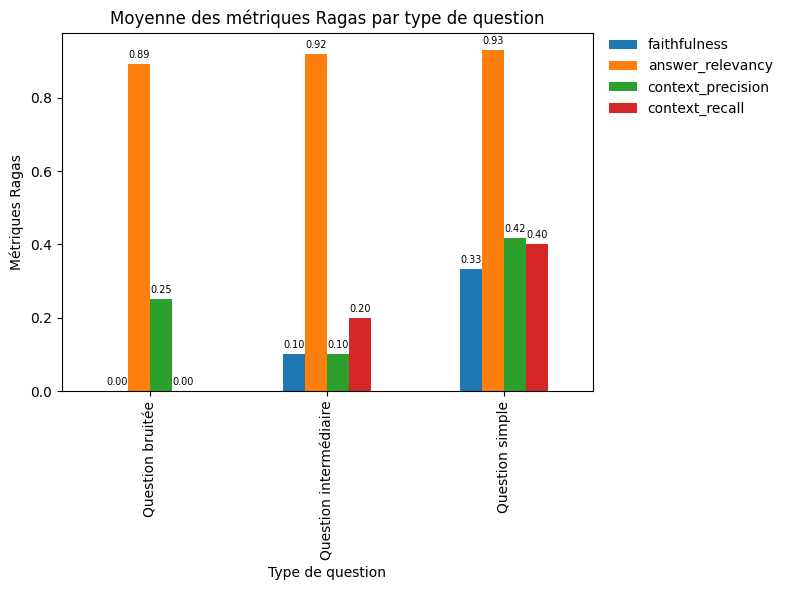

In [8]:
# Création figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot
df_groupby.plot(kind='bar', ax=ax)
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),   # décale à droite
    borderaxespad=0,
    frameon=False
)
plt.title('Moyenne des métriques Ragas par type de question')
plt.xlabel('Type de question')
plt.ylabel('Métriques Ragas')
plt.tight_layout()
# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=7, padding=3)

plt.savefig('graph/Moyenne_metriques_ragas_par_question.png',dpi=fig.dpi)
plt.show()


### Préparation pour visualisation au global

In [4]:
df_global = df[
    ['faithfulness',
     'answer_relevancy',
     'context_precision',
     'context_recall']
].mean()

df_global

faithfulness         0.125000
answer_relevancy     0.911121
context_precision    0.243590
context_recall       0.214286
dtype: float64

/var/folders/_7/crqqrrwd7ll_32f8lmt0d12h0000gn/T/ipykernel_53032/3909974736.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


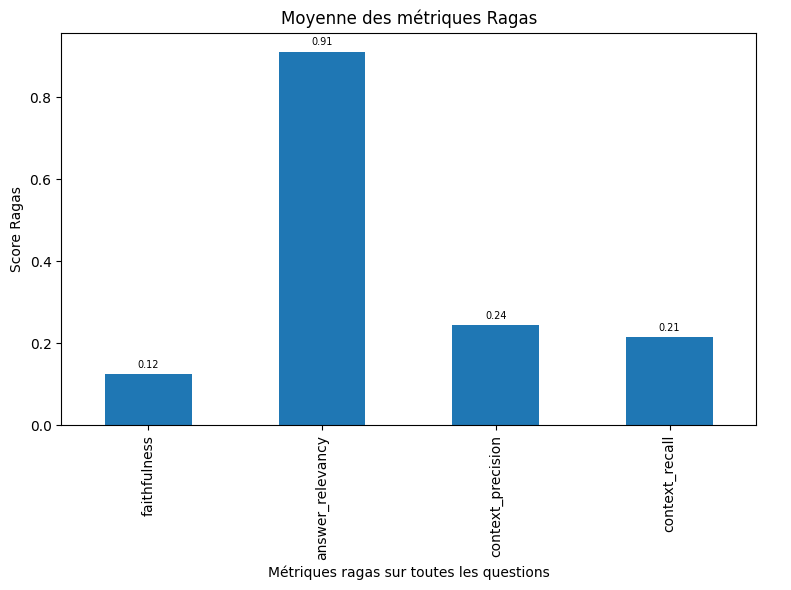

In [6]:
# Création figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot
df_global.plot(kind='bar', ax=ax)
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1),   # décale à droite
    borderaxespad=0,
    frameon=False
)
plt.title('Moyenne des métriques Ragas')
plt.xlabel('Métriques ragas sur toutes les questions')
plt.ylabel('Score Ragas')
plt.tight_layout()
# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=7, padding=3)

plt.savefig('graph/Moyenne_metriques_ragas.png',dpi=fig.dpi)
plt.show()
